# Desafío - Pruebas de hipótesis
## Autor: Pablo Veloz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import matplotlib.gridspec as gridspec

df = pd.read_csv('nations.csv', encoding = 'ISO-8859-1',sep=',', engine='python')

In [2]:
df.head()
#df.region.value_counts("%")

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


# 1. Evaluar juicios de hipótesis
### A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible rechazar la hipótesis nula.
* 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron comoheterosexuales. El objetivo era medir actitudes frente a la adopción homoparentales. La organización encargada de procesar los datos obtuvo los siguientes resultados:
* El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental.
* Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
* Con un valor de prueba p=11.83 y un puntaje de corte de 2.58, ¿qué se debe concluir?



## <font color="blue">Conclusión: </font>

Cuando realiza una prueba de hipótesis en estadística, un valor p ayuda a determinar la importancia de sus resultados. Las pruebas de hipótesis se utilizan para probar la validez de una afirmación que se hace sobre una población. Esta afirmación que está en juicio, en esencia, se llama hipótesis nula.
La hipótesis alternativa es la que se cree si se concluye que la hipótesis nula es falsa. La evidencia en el juicio son sus datos y las estadísticas que lo acompañan. Todas las pruebas de hipótesis finalmente usan un valor p para sopesar la fuerza de la evidencia (lo que los datos le dicen sobre la población). El valor p es un número entre 0 y 1 y se interpreta de la siguiente manera:
Un valor p pequeño (normalmente p≤ 0.05) indica una fuerte evidencia en contra de la hipótesis nula, por lo que se rechaza la hipótesis nula (digamos de 1:20).
Un valor p grande (p> 0.05) indica evidencia débil contra la hipótesis nula, por lo que no puede rechazar la hipótesis nula.
Los valores de p muy cercanos al valor de corte (0.05) se consideran marginales (podrían ir en cualquier caso).

* En este caso: $$P(-2.58 <= X <= 2.58) = 0.99$\$ 

- El valor p asociado sin corrección con un nivel de confianza del 99% es 0,01. Y por lo tanto, la hipótesis nula que corresponde a que ambos porcentajes no son diferentes o habría una diferencia significativa, en efecto, sería falsa.

# 2. Importe la base de datos utilizada la sesión presencial anterior
* Agrege una serie de variables binarias por cada continente de la variable region .tip: Utilice np.where para ello.
* De manera similar a la sesión anterior, enfóquese en las siguientes variables:
* Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life .
* Apellidos desde la N hasta la Z: Enfocarse en las variables femlab , literacy y school .

In [3]:
df["flag_Africa"]= np.where(df["region"]=="Africa",1,0)
df["flag_Asia"]= np.where(df["region"]=="Asia",1,0)
df["flag_Europe"]= np.where(df["region"]=="Europe",1,0)
df["flag_Oceania"]= np.where(df["region"]=="Oceania",1,0)
df["flag_Americas"]= np.where(df["region"]=="Americas",1,0)
df_subset=df[["femlab","literacy","school","flag_Africa","flag_Asia","flag_Europe","flag_Oceania","flag_Americas"]]
df_subset.head(5)

,femlab,literacy,school,flag_Africa,flag_Asia,flag_Europe,flag_Oceania,flag_Americas
0,0.4522,72.599998,6.716667,1,0,0,0,0
1,0.8482,41.700001,3.100000,1,0,0,0,0
2,0.8870,84.099998,8.600000,1,0,0,0,0
3,0.8584,23.600000,1.300000,1,0,0,0,0
4,1.0344,66.599998,2.483333,1,0,0,0,0


# 3. Implemente una función de prueba de hipótesis a mano
* La función debe ingresar los siguientes argumentos:
* df : La tabla de datos.
* variable : La variable a analizar.
* binarize : El indicador binario a utilizar.
* tips:
* Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna() .
* Implemente ttest_ind de scipy.stats y guarde el valor t y pval .
* Reporte las medias para cada grupo (0 y 1).
* Reporte la diferencia de entre las medias.
* Reporte los valores t y p

In [4]:
def hipotesis_a_mano(dataframe,variable,binarize):
    df_variable_flag=dataframe[dataframe[binarize]==1][variable].dropna()
    df_variable_noflag=dataframe[dataframe[binarize]==0][variable].dropna()
    
    df_variable_flag_mean=df_variable_flag.mean()
    df_variable_noflag_mean=df_variable_noflag.mean()
    
    diff_mean=df_variable_flag_mean-df_variable_noflag_mean
    var_stats=stats.ttest_ind(df_variable_flag, df_variable_noflag)
    
    
    return round(df_variable_flag_mean,5),round(df_variable_noflag_mean,5),round(diff_mean,5),var_stats

flag_mean,noflag_mean,diff_mean,var_stats=hipotesis_a_mano(df,"femlab","flag_Africa")
print("***Africa femlab***")
print("Media flag_Africa: ",flag_mean)
print("Media NO flag_Africa: ",noflag_mean)
print("Diferencia Medias flag_Africa: ",diff_mean)
print("Var stats: ",var_stats,"\n")
print("***Africa literacy***")
flag_mean,noflag_mean,diff_mean,var_stats=hipotesis_a_mano(df,"literacy","flag_Africa")
print("Media flag_Africa: ",flag_mean)
print("Media NO flag_Africa: ",noflag_mean)
print("Diferencia Medias flag_Africa: ",diff_mean)
print("Var stats: ",var_stats,"\n")
print("***Africa school***")
flag_mean,noflag_mean,diff_mean,var_stats=hipotesis_a_mano(df,"school","flag_Africa")
print("Media flag_Africa: ",flag_mean)
print("Media NO flag_Africa: ",noflag_mean)
print("Diferencia Medias flag_Africa: ",diff_mean)
print("Var stats: ",var_stats,"\n")

flag_mean,noflag_mean,diff_mean,var_stats=hipotesis_a_mano(df,"femlab","flag_Europe")
print("***Europe femlab***")
print("Media flag_Europe: ",flag_mean)
print("Media NO flag_Europe: ",noflag_mean)
print("Diferencia Medias flag_Europe: ",diff_mean)
print("Var stats: ",var_stats,"\n")
print("***Europe literacy***")
flag_mean,noflag_mean,diff_mean,var_stats=hipotesis_a_mano(df,"literacy","flag_Europe")
print("Media flag_Europe: ",flag_mean)
print("Media NO flag_Europe: ",noflag_mean)
print("Diferencia Medias flag_Europe: ",diff_mean)
print("Var stats: ",var_stats,"\n")
print("***Europe school***")
flag_mean,noflag_mean,diff_mean,var_stats=hipotesis_a_mano(df,"school","flag_Europe")
print("Media flag_Europe: ",flag_mean)
print("Media NO flag_Europe: ",noflag_mean)
print("Diferencia Medias flag_Europe: ",diff_mean)
print("Var stats: ",var_stats,"\n")


***Africa femlab***
Media flag_Africa:  0.72991
Media NO flag_Africa:  0.6761
Diferencia Medias flag_Africa:  0.05381
Var stats:  Ttest_indResult(statistic=1.783872878266046, pvalue=0.0761771840435915) 

***Africa literacy***
Media flag_Africa:  65.30851
Media NO flag_Africa:  90.19858
Diferencia Medias flag_Africa:  -24.89007
Var stats:  Ttest_indResult(statistic=-8.909991173873896, pvalue=3.3857112156459963e-15) 

***Africa school***
Media flag_Africa:  4.52288
Media NO flag_Africa:  8.55231
Diferencia Medias flag_Africa:  -4.02944
Var stats:  Ttest_indResult(statistic=-10.415811831777058, pvalue=2.6352830456717332e-20) 

***Europe femlab***
Media flag_Europe:  0.77163
Media NO flag_Europe:  0.67046
Diferencia Medias flag_Europe:  0.10118
Var stats:  Ttest_indResult(statistic=3.063523760334362, pvalue=0.0025335604834548654) 

***Europe literacy***
Media flag_Europe:  98.17727
Media NO flag_Europe:  78.2927
Diferencia Medias flag_Europe:  19.88457
Var stats:  Ttest_indResult(statistic

# 4. Implemente una función que grafique los histogramas para ambas muestras.
* Genere una función que devuelva un gráfico donde visualice las dos histogramas cuando la variable es 1 y 0, respectivamente.
* tips: Refactorize la función incluyendo el método hist de matplotlib.pyplot .
* Incluya los argumentos alpha y label .
* Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

In [5]:
def histograma_hipotesis_a_mano2(dataframe,binarize):
    fig = plt.figure()
    plt.subplots_adjust(wspace=0.6,right = 2.0)
    for i,n in enumerate(["femlab","literacy","school"]):
        
        df_variable_flag=dataframe[dataframe[binarize]==1][n].dropna()
        df_variable_noflag=dataframe[dataframe[binarize]==0][n].dropna()
        df_variable_flag_mean=df_variable_flag.mean()
        df_variable_noflag_mean=df_variable_noflag.mean()
        diff_mean=df_variable_flag_mean-df_variable_noflag_mean
        var_stats=stats.ttest_ind(df_variable_flag, df_variable_noflag)
        
        
        ax1 = fig.add_subplot(1,3, i+1)

        sns.distplot(df_variable_flag,ax=ax1, hist=True,hist_kws={"histtype": "step", "linewidth": 1,"alpha": 1},kde_kws={"lw": 3, "label": binarize+" 1"})
        sns.distplot(df_variable_noflag,ax=ax1, hist=True,hist_kws={"histtype": "step", "linewidth": 1,"alpha": 1},kde_kws={"lw": 3, "label": binarize+" 0"})
        plt.title("Continente: "+binarize +" Variable: "+n + "\n statistic: "+str(round(var_stats[0],5))+" p-value: "+str(round(var_stats[1],5)) )
    #plt.show()


# -  <font color="red">Africa</font>

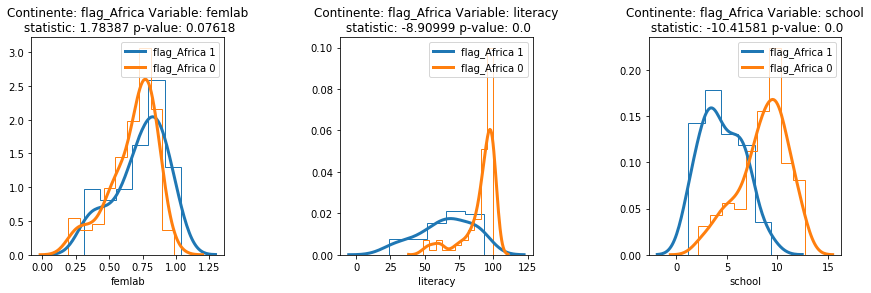

In [6]:
histograma_hipotesis_a_mano2(df,"flag_Africa")

### Análisis Africa:
-Si consideramos Hipotesis nula como:
$H_{0}: \mu_{0}=\mu_{1}$
* No es posible descartar la Hipotesis nula para La variable femlab, ya que obtenemos un pvalue igual a 0.07618, teniendo presente un 99% de nivel de confianza.
* Tanto para la variable literacy y school, se descarta $H_{0}$
    

# -  <font color="red">Asia</font>

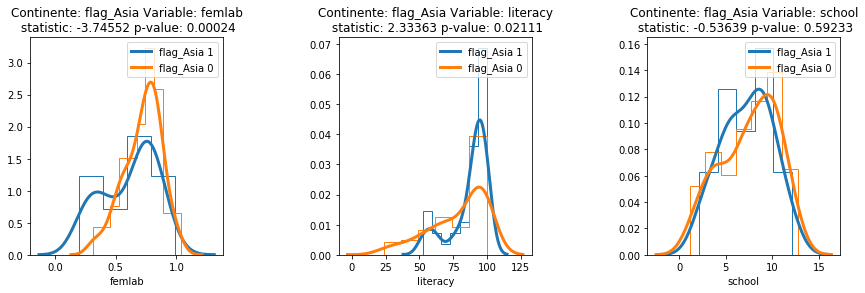

In [7]:
histograma_hipotesis_a_mano2(df,"flag_Asia")

### Análisis Asia:
__Al contrario del continente Africano, se tiene:__

-Si consideramos Hipotesis nula como:
$H_{0}: \mu_{0}=\mu_{1}$
* No es posible descartar la Hipotesis nula para La variable __literacy y school__, ya que obtenemos un pvalue igual a 0.02 y 0,59 respectivamente, teniendo presente un 99% de nivel de confianza.
* Tanto para la variable femlab, se descarta $H_{0}$

# -  <font color="red">Europe</font>

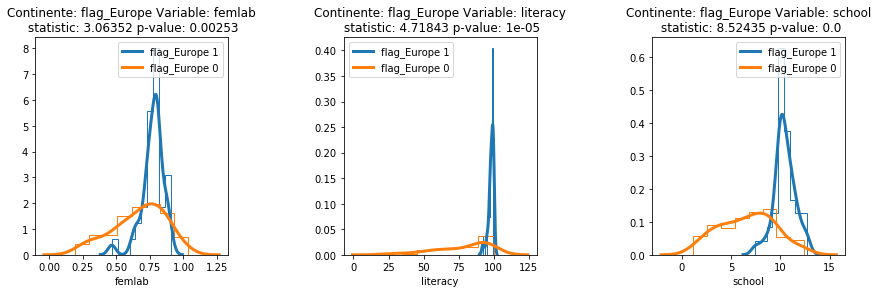

In [8]:
histograma_hipotesis_a_mano2(df,"flag_Europe")

### Análisis Europe:

-Si consideramos Hipotesis nula como:
$H_{0}: \mu_{0}=\mu_{1}$
* Se descarta hipótesis nula, para todos los casos observados.

# -  <font color="red">America</font>

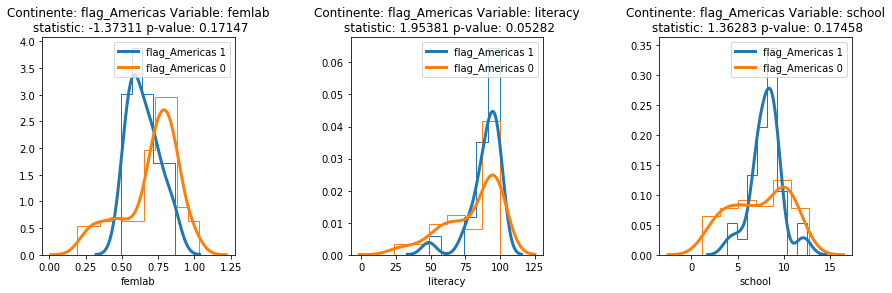

In [9]:
histograma_hipotesis_a_mano2(df,"flag_Americas")

### Análisis América:
__Al contrario del continente Europe, se tiene:__

-Si consideramos Hipotesis nula como:
$H_{0}: \mu_{0}=\mu_{1}$
* No es posible descartar hipotesis nula, ya que están dentro del nivel de confianza establecido al 99%. Además es posible observar la similitud de las curvas.

# -  <font color="red">Oceania</font>

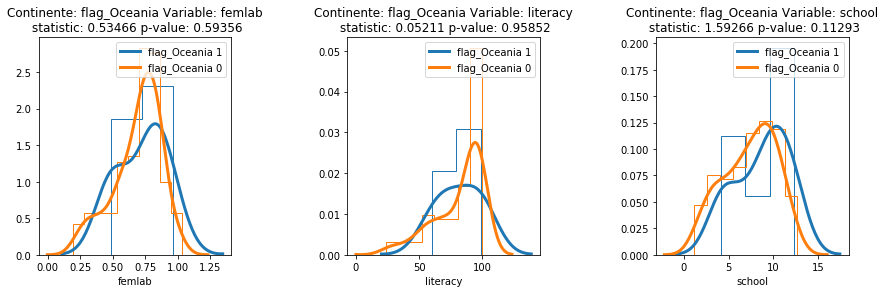

In [10]:
histograma_hipotesis_a_mano2(df,"flag_Oceania")

### Análisis Oceania:
__Al igual que el continente America, se tiene:__

-Si consideramos Hipotesis nula como:
$H_{0}: \mu_{0}=\mu_{1}$
* No es posible descartar hipotesis nula, ya que están dentro del nivel de confianza establecido al 99%. Cabe destacar la variable __literacy__ con un __pvalue al 0.95__